In [127]:
# this scipt works perfectly. It was test on one of the homes in pecan street
import fhmm_support as fhm
#reload(fhm)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from collections import OrderedDict
from hmmlearn import hmm
import warnings
warnings.filterwarnings('ignore')

In [128]:
dpath = "/Volumes/MacintoshHD2/Users/haroonr/Detailed_datasets/Dataport/mix_homes/default_3months/115.csv"
df = pd.read_csv(dpath)[1:3000]
df.index = df.localminute
df_new = df[['refrigerator1','air1','furnace1']]
df_new['total'] = df_new.sum(axis=1)
df_new.columns = ['ref','ac','furnace','total']

In [129]:
mean = OrderedDict()
power = OrderedDict()
learnt_model = OrderedDict() 

In [130]:
mean['ref'] = np.array([[0],[120]])
mean['ac'] = np.array([[0],[1200]])
mean['furnace'] = np.array([[0],[250]])
power['ref'] = df_new['ref']
power['ac'] = df_new['ac']
power['furnace'] = df_new['furnace']

In [131]:
for appliance in power:
    learnt_model[appliance] = hmm.GaussianHMM(len(mean[appliance]),"full")
    temp = [power[appliance].values.reshape(len(power[appliance]),1)]
    learnt_model[appliance].fit(temp)

In [136]:
# sort all the parameters and update new models with these 
new_learnt_models= OrderedDict()
for appliance in power:
    startprob, means, covars, transmat = fhm.sort_learnt_parameters(learnt_model[appliance].startprob_, learnt_model[appliance].means_, learnt_model[appliance].covars_ , learnt_model[appliance].transmat_) 
    new_learnt_models[appliance]=hmm.GaussianHMM(startprob.size, "full", startprob, transmat)
    new_learnt_models[appliance].means_ = means
    new_learnt_models[appliance].covars_ = covars

In [138]:
learnt_model_combined = fhm.create_combined_hmm(new_learnt_models)

[(0.0, 0.0, 0.0), (0.0, 0.0, 235.91132332876847), (0.0, 1089.3091168087656, 0.0), (0.0, 1089.3091168087656, 235.91132332876847), (110.8920925025242, 0.0, 0.0), (110.8920925025242, 0.0, 235.91132332876847), (110.8920925025242, 1089.3091168087656, 0.0), (110.8920925025242, 1089.3091168087656, 235.91132332876847)]
8


In [139]:
# for appliance in power:
#     print(appliance)
#     print(learnt_model[appliance].means_)
#     print(learnt_model[appliance].startprob_)
#     print(learnt_model[appliance].transmat_)

In [140]:
temp1 = df_new['total'].values.reshape(len(df_new['total']),1)
new_learnt_states = learnt_model_combined.predict(temp1)

In [142]:
[decoded_states, decoded_power] = fhm.decode_hmm(len(new_learnt_states), mean, [appliance for appliance in power], new_learnt_states)

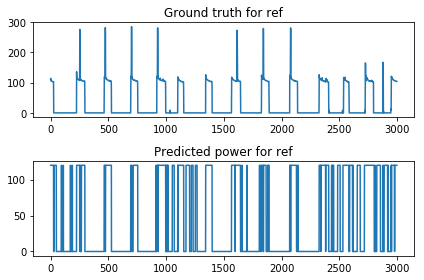

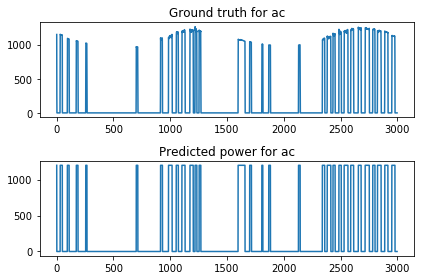

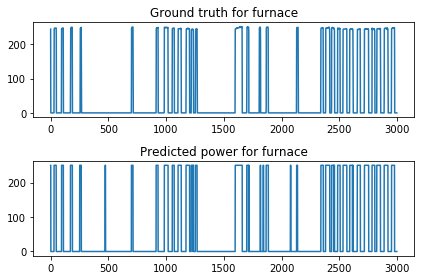

In [143]:
for appliance in power:
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(power[appliance].values)
    plt.title('Ground truth for %s' %appliance)
    plt.subplot(2,1,2)
    plt.plot(decoded_power[appliance])
    plt.title('Predicted power for %s' %appliance)
    #plt.ylim((np.min(power[appliance])-10, np.max(power[appliance])+10))
    plt.tight_layout()

In [147]:
#np.allclose(new_learnt_states,decoded_states)